# **Lab 6**

## Setup
*Make fake background: a poisson distribution with mean = 100*

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
bkgd1 = stats.poisson.rvs(mu = 100, size = int(1e6))

## **Problem 1**
*Determine the $5\sigma$ sensitivity of the background*

In [3]:
prob = stats.norm.sf(5, loc = 0, scale = 1)
threshold = stats.poisson.isf(prob, mu = 100)
print("The five sigma sensitivity threshold for a poisson distribution with",
      "mean = 100 is {0:0.0f} counts".format(threshold))

The five sigma sensitivity threshold for a poisson distribution with mean = 100 is 154 counts


## **Problem 2**
*Inject a signal of known strength. Make it strong ~ $8-30 \sigma$ inject the signal many times*  


In [4]:
# Calculate 8 sigma
prb8Sig = stats.norm.sf(8, loc = 0, scale = 1)
threshold8Sig = stats.poisson.isf(prb8Sig, mu = 100)
print(f"8 sigma corresponds to a measuremnt of {threshold8Sig} counts")

8 sigma corresponds to a measuremnt of 190.0 counts


In [5]:
# Injects signal so that backroungs is at least 8 sigma above mu
data1 = bkgd1 + 100

**a.**  
*Histogram how bright the observed signal appears to be and discuss it's shape. Say in words what the histogram is telling you.*

Text(0, 0.5, 'probability')

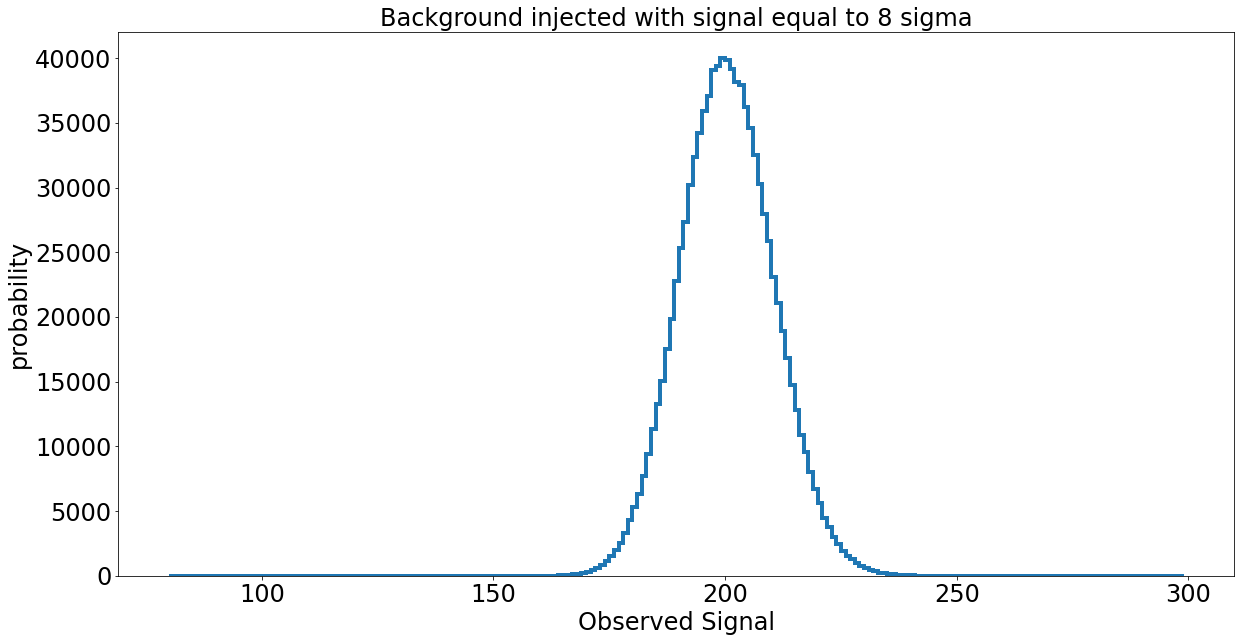

In [6]:
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)

#Use the same binning as will be used for 2D histogram
bins = np.arange(80, 300, 1)

height, bins, _ = ax.hist(data1, bins = bins, 
                          histtype = 'step', linewidth = 4)
ax.set_title("Background injected with signal equal to 8 sigma", 
             fontsize = 24)
ax.set_xlabel("Observed Signal", fontsize = 24)
ax.set_ylabel("probability", fontsize = 24)

This histogram has the shape of poisson distiribution with mean equal to 100 that has been shifted to the right by 190. This histogram represents the probability distribution of measurements given that the true signal was equal to 190. 

**b.**  
Yes the signal is biased: The probability of measuring a value equal to the true injected signal is very inlikely. This is a result of the observed signal being a poisson distribution of mean equal to 100. In the limit that $\mu \rightarrow \infty$ the poisson distribution looks like a gaussian distribution. For small $\mu$ the poisson distribution is not symmetric. Since our background is a poisson distribution with $\mu = 100$ this distribution is very nearly symmetric.

## **Problem 3**  
*Now make a suite of injected signals. They should extend from 0 to well above $5\sigma$ ($30\sigma$ or more)*

In [25]:
# 5 sigma is corresponds to a measuremnt of 150
bkgd2 = stats.poisson.rvs(mu = 100, size = int(1e7))
signal = stats.uniform.rvs(loc = 0, scale = 200, size = int(1e7))

#Using the same background from before, add the signals to the background
data2 = bkgd2 + signal

**a.**  
*Clearly state what you are simulating, make a 2D histogram of injected signal vs. observed data*

We are simulating different strengths of true signals between 0 and 200. Using these simulated true signals, we generate the probability distribution of different observed signals. 

Text(0.5, 0, 'Observed data, $P(d|s)$')

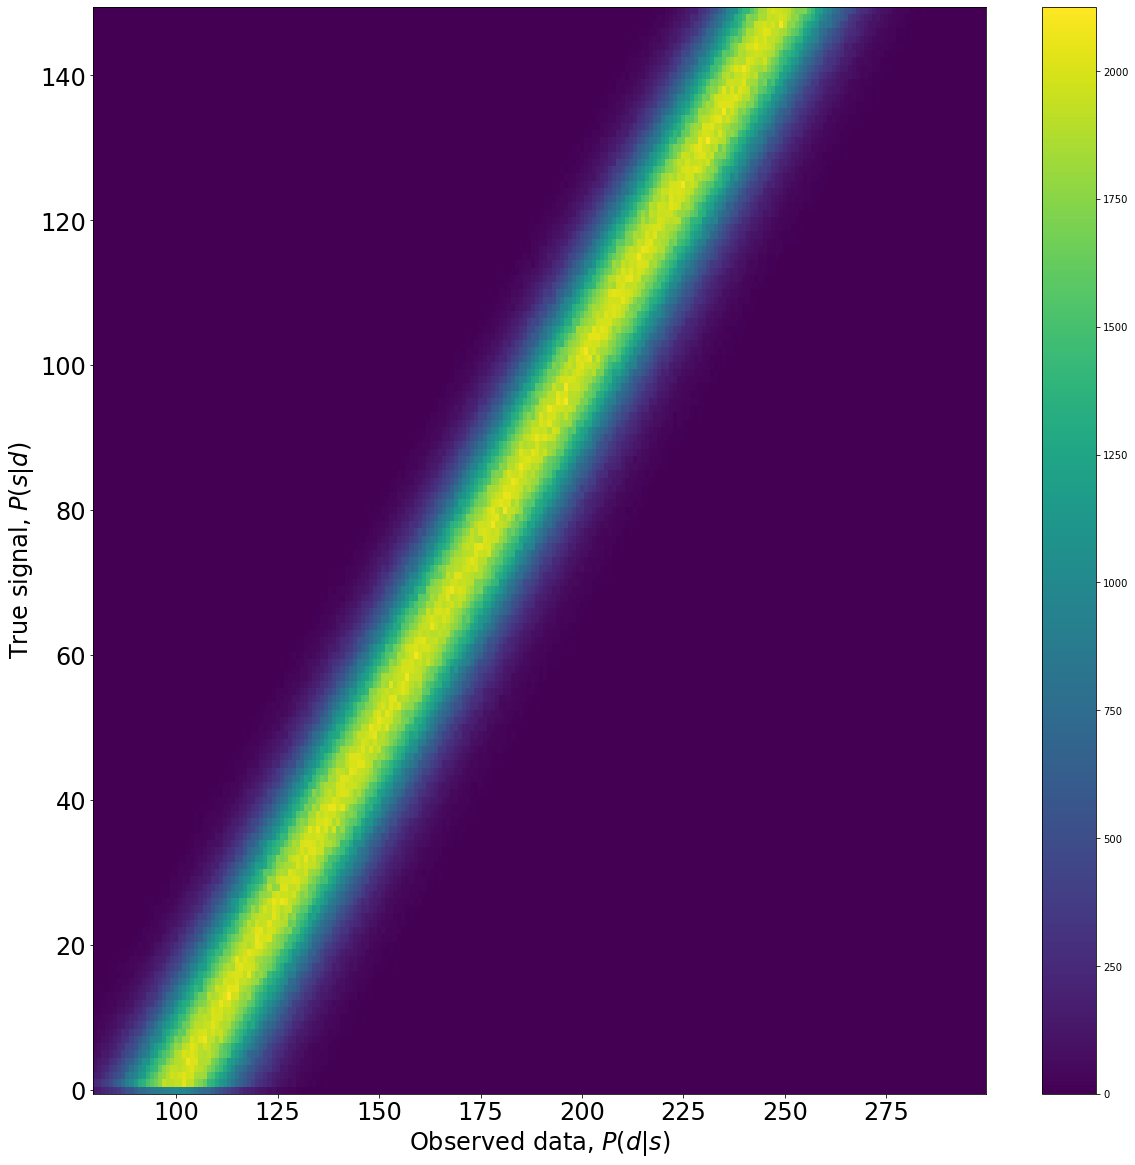

In [41]:
fig, ax = plt.subplots(1,1, figsize = (20,20))
plt.tick_params(labelsize = 24)

signaledges = np.arange(-0.5,150.5,1)
dataedges = np.arange(79.5,300.5,1)

H, xedge, yedge, img = ax.hist2d(data2, signal, 
                                 bins=[dataedges,signaledges])
plt.colorbar(img)
ax.set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax.set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

**b.**  
*Now for the same injected signal power, show that you get the same answer*



1.0
0.9999999999999998


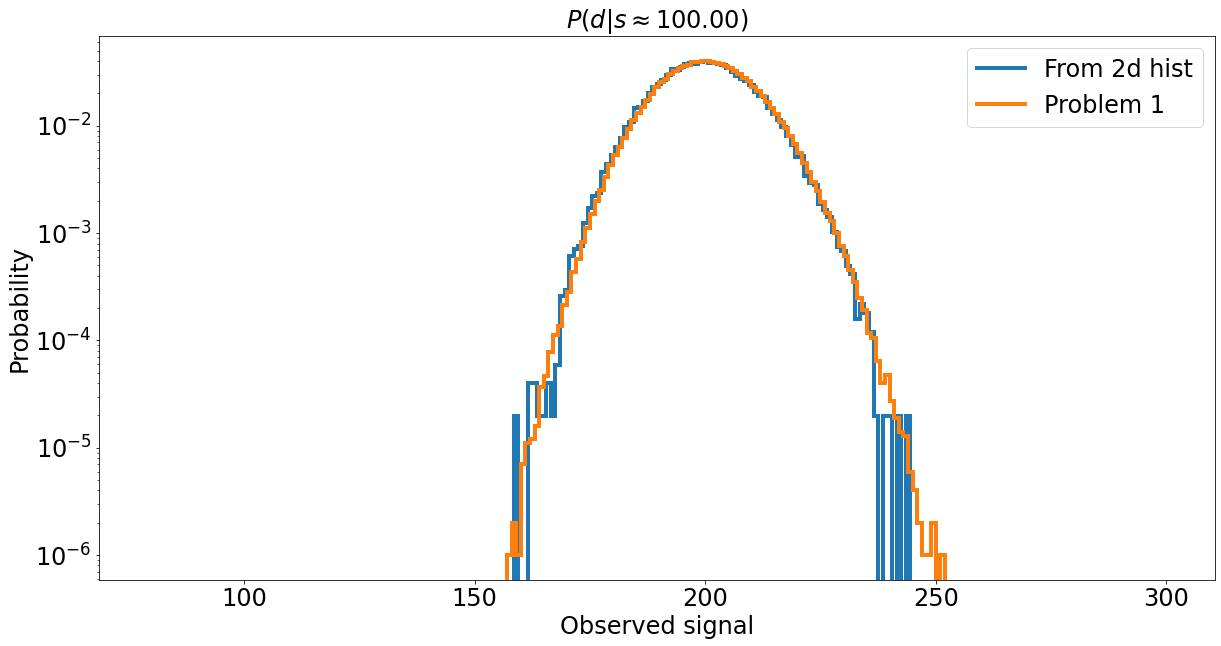

In [42]:
cut = 100 # The bin of H

signalCenters = (signaledges[:-1] + signaledges[1:])/2
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)

# Normalize the histogram
area = sum(H.T[cut,:])
normH = H.T[cut,:]/area
print(normH.sum()) #check that it adds to 1

ax.stairs(normH, dataedges, linewidth = 4, label = "From 2d hist")

# normalize the sample from part 1
normHeights = height/sum(height)
print(sum(normHeights))

ax.stairs(normHeights, bins, linewidth = 4, label = "Problem 1")

ax.set_title(f"$P(d|s \\approx {signalCenters[cut]:0.2f})$", 
             fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("Observed signal", fontsize = 24)
ax.set_yscale('log')
ax.legend(fontsize = 24)

The close correspondence between the above two histograms demonstrates that single true valued signal histogram generated in problem 1 correponds closley to the mutli true valued histogram from porblem 2. Near the edges of the historgam there is less agreement beteen the two. Increasing the size of the samples drawn for the 2D histogram results in the histogram drawn from the 2D histogram matching more closley to the histogram from problem 1 nnear the edges. 

**c.**  
*Reverse the problem: Choose some oberserved signal greater than 5 sigma, and create a 1D histogram of the true signal probability given the observed data.*

1.0


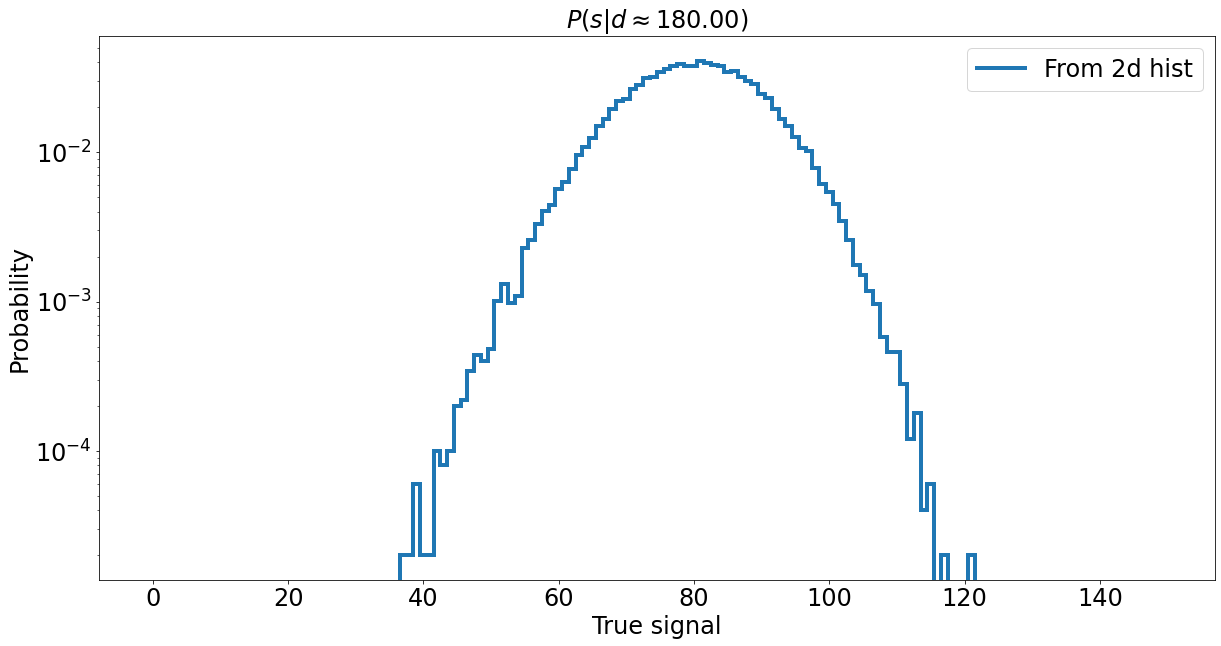

In [43]:
# 5 sigma corresponds to a measurment of 150
cutPsd = 100

dataCenters = (dataedges[:-1] + dataedges[1:])/2
fig, ax = plt.subplots(1,1, figsize = (20, 10))
plt.tick_params(labelsize = 24)

# Normalize the histogram
area = sum(H.T[:,cutPsd])
normH = H.T[:,cutPsd]/area
print(normH.sum()) #check that it adds to 1

ax.stairs(normH, signaledges, linewidth = 4, label = "From 2d hist")

ax.set_title(f"$P(s|d \\approx {dataCenters[cutPsd]:0.2f})$", 
             fontsize = 24)
ax.set_ylabel("Probability", fontsize = 24)
ax.set_xlabel("True signal", fontsize = 24)
ax.set_yscale('log')
ax.legend(fontsize = 24)

The above histogram gives the probabilities of true signals given the oberved signal of 180.5 counts.

**d.**  
*What is the 1 sigma uncertainty on the tru signal strength?*  
To calculate the $1 \sigma$ uncertainty the above histogram needs to be integreated outwards from the mean to inculude 34% of the data in both directions. 

In [85]:
# estimate the mean of the histogram

meanEstimate = sum(H.T[:,cutPsd] * signalCenters)/sum(H.T[:,cutPsd])
print(f'The mean true value is {meanEstimate}')

# Now integrate 34% to the left and right of this
normHeights = H.T[:,cutPsd]/sum(H.T[:,cutPsd])

hist = np.array([normHeights, signalCenters])
s = 0
b = 80
while s < 0.34: 
    s = s + normHeights
    b = b + 1
print(f'The upper 1 sigma bound is {b}')

s = 0
b = 80
while s < 0.34: 
    s = s + hist[0,b]
    b = b - 1
print(f'The lower 1 sigma bound is {b}')

The mean true value is 79.96289003636656


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**e.**  
The 1 sigma uncertainty bound for the true signal is 80 plus or minus 10. This is a symmetric interval, which is to be expected since the background is very nealy a gaussian distribution. Further more this answer is biased since the signal of 80 is smaller than the observation of 180. 